# Actividad Semanal -- 7  Regresiones y K means
- Materia: Ciencia y Analítica de Datos.
- Nombre de la entrega: Actividad Semanal 7 Regresiones y K means
- Fecha: 09/11/2022.
- Alumno: Roberto Santiago Oliva - A01374957.


Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz


Encuentra el numero ideal de almacenes, justifica tu respuesta:

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.
Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?
¿Consideras importante que se grafique en un mapa?, ¿por qué?
Agrega las conclusiones

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 3.0 MB/s 
     |████████████████████████████████| 1.0 MB 42.5 MB/s 
     |████████████████████████████████| 1.7 MB 28.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 59.8 MB/s 
     |████████████████████████████████| 6.3 MB 21.8 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=62c0709b8da708e05c52f6f98ce1cbc10ef706d4dc13394a44998eac8304eee3
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=86847ff7b4f94be1098fe2bc92a5e9fc87cca892bf94e774b8029978412fac6c
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

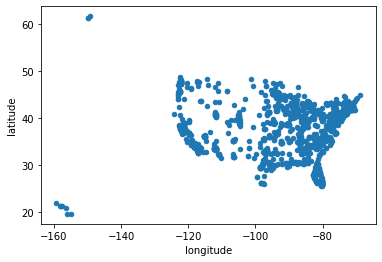

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

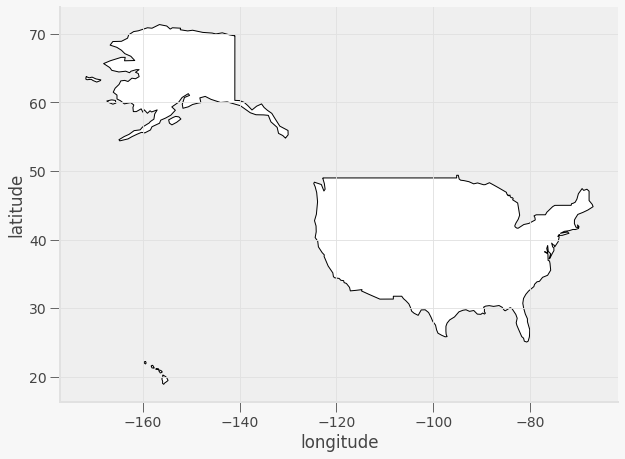

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

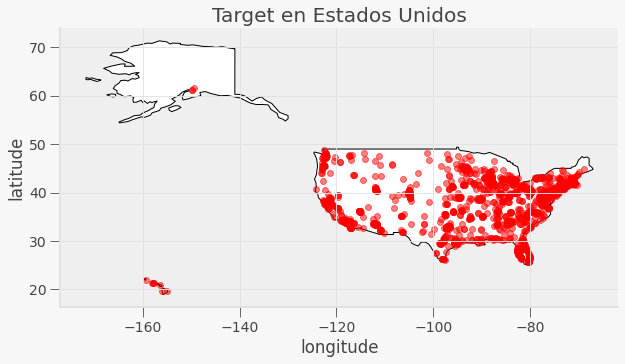

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

####**Librerias**

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

####**Longitud y latitud**

In [29]:
X = df[["latitude","longitude"]]
X.head()

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422


####**Modelo k-means con valor de n_clusters aleatorio**

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(latlong)
y_kmeans = kmeans.predict(latlong)

####**Visualización de los clusters y sus centros**

Imprimimos los centros de los clusters: 
 [[ 3.19865745e+01 -8.32356211e+01  3.26923077e-01]
 [ 3.74725192e+01 -1.18722687e+02  1.00000000e+00]
 [ 3.84320696e+01 -9.38750043e+01  1.99482759e+00]
 [ 4.05542888e+01 -7.68049391e+01  4.21884749e-15]]


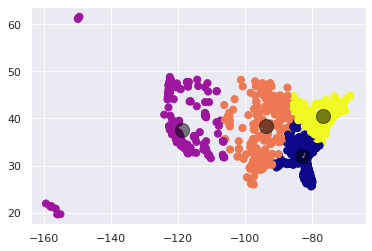

In [31]:
plt.scatter(latlong["longitude"], latlong["latitude"], c = y_kmeans, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
print("Imprimimos los centros de los clusters: \n",centers)
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5)

**¿Como elegimos el numero de almacenes?**

Se puede utilizar el método llamado "silhouette", este nos indica el número de clusters optimo que se necesitan.

Al utilizarlo y obtener un resultado cercano a +1 quiere decir que el almacen esta correctamente ubicado dentro del cluster, sin embargo, un resultado cercano a 0 nos indica que el almacen está muy cerca del cluster pero no está correctamente ubicado; Y un resultado cercano a -1 quiere decir que el almacen no fue ubicado en el cluster correcto.

In [32]:
kmeans_per_k = [ KMeans(n_clusters=k, random_state=42).fit(latlong) for k in range(1, 11) ]
kmeans_per_k

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42)]

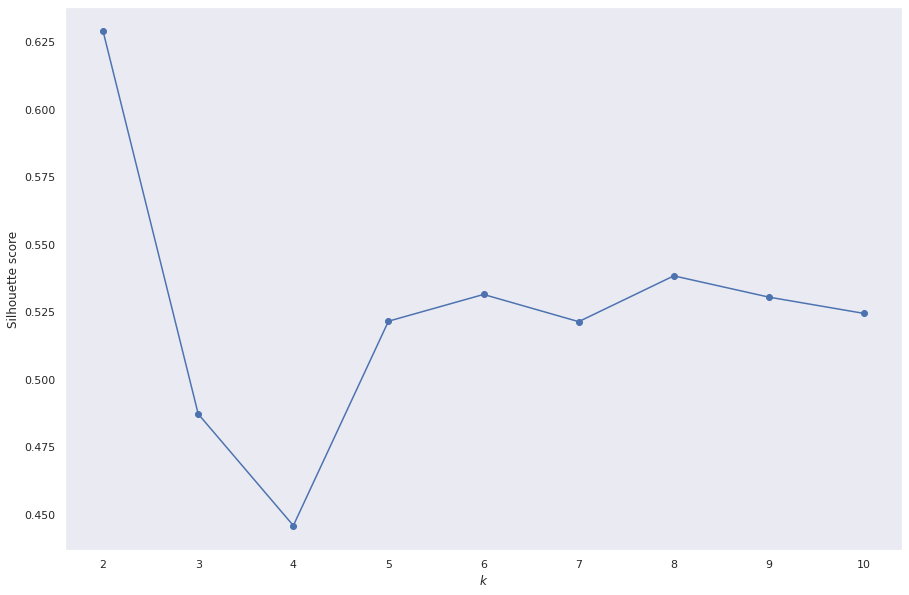

In [33]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(latlong, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(15, 10))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

#####Como se observa en la grafica del elbow el mejor numero de clusters es 5 ya con 2 clusters se sobre entrena haciendo un kmean para cada tienda, y no teniendo una agrupacion de tiendas cercanas. El metodo elbow curve, nos permite ver la cantidad de tiendas que necesitamos
####Dangeti, P. (2017). The elbow method. In Statistics for Machine Learning. Birmingham, UK: O´REILLY.
####https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml#:~:text=The%20elbow%20method%20is%20used,by%20different%20values%20of%20k.

PCA es para reducir dimensiones, la variabilidad de tus datos, para trabajar con menos variables de entrada y KMeans es para hacer clusteres, aqui solo los agrupas y la variabilidad no nos importa

In [43]:
#Usamos 9 clusters como se indico arriba:
kmeans = KMeans(n_clusters = 5, init ='k-means++')

kmeans.fit(latlong[latlong.columns[0:4]])

labels = kmeans.labels_
labels

array([4, 4, 4, ..., 0, 0, 2], dtype=int32)

In [45]:
X = df[["longitude","latitude"]]

#Alimentamos el cluster con el dataframe y entrenamos al kmeans:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
# Centros de los clusters:
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C


,0,1,Coordinates
0,-88.354978,41.759636,POINT (-88.35498 41.75964)
1,-119.176343,37.579774,POINT (-119.17634 37.57977)
2,-82.933092,31.103912,POINT (-82.93309 31.10391)
3,-98.266337,34.420357,POINT (-98.26634 34.42036)
4,-75.585080,40.343655,POINT (-75.58508 40.34366)


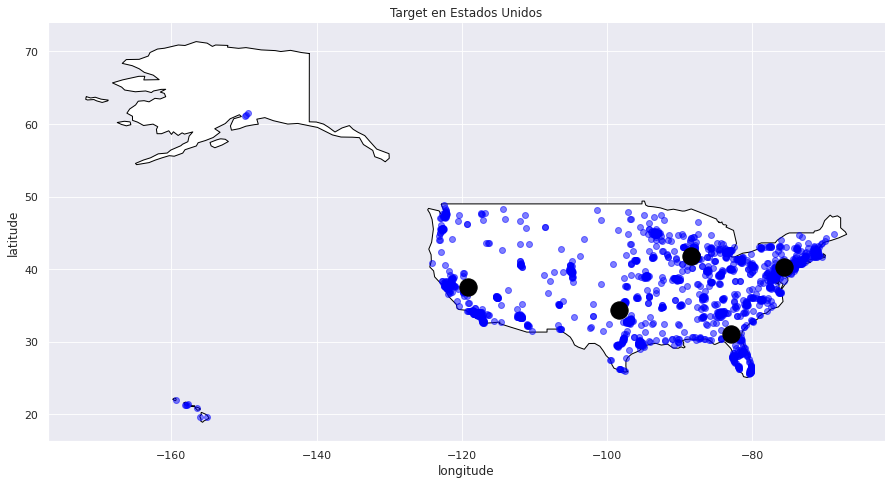

In [46]:
fig, gax = plt.subplots(figsize=(15,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white') #Aqui traemos el mapa de los unites

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='blue', alpha = 0.5) #Aqui grafica los datos originales
gdf_C.plot(ax=gax, color='black', alpha = 1, markersize = 300) #Aqui grafica los datos de nuestro dataset de arriba

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


Las latitudes y longitudes de nuestros almacenes son: 
 [[ 3.11039116e+01 -8.29330921e+01  2.00000000e+00]
 [ 3.75797742e+01 -1.19176343e+02  1.00000000e+00]
 [ 4.03458975e+01 -7.55982244e+01  4.00000000e+00]
 [ 3.44203568e+01 -9.82663372e+01  3.00000000e+00]
 [ 4.17604405e+01 -8.83702876e+01 -3.99680289e-15]]


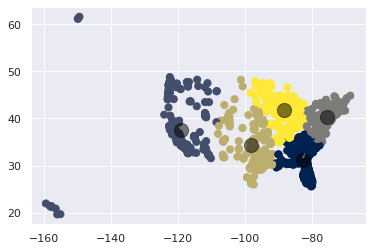

In [58]:
# Entrenemos nuestro modelo con n_clusters = 5
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(latlong)
y_kmeans = kmeans.predict(latlong)

# Grafica para anlisis visual de nuestros clusters y locacion de los almacenes
plt.scatter(latlong["longitude"], latlong["latitude"], c = y_kmeans, s=50, cmap='cividis')

centers = kmeans.cluster_centers_
print("Las latitudes y longitudes de nuestros almacenes son: \n",centers)
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5)

##**¿A cuantas tiendas surtira cada cluster?**

In [47]:
latlong['kmeans'] = kmeans.labels_ 
latlong.loc[:, 'kmeans'].value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


4    480
0    422
1    368
3    296
2    273
Name: kmeans, dtype: int64

In [48]:
gdf_C

,0,1,Coordinates
0,-88.354978,41.759636,POINT (-88.35498 41.75964)
1,-119.176343,37.579774,POINT (-119.17634 37.57977)
2,-82.933092,31.103912,POINT (-82.93309 31.10391)
3,-98.266337,34.420357,POINT (-98.26634 34.42036)
4,-75.585080,40.343655,POINT (-75.58508 40.34366)


In [54]:
from pandas.core.internals.concat import concat_arrays

#Obtenemos los valores de nuestro dataset de clusters, obtenemos las geolocalizaciones:
Location1 = str(gdf_C[1][0]) + ", " + str(gdf_C[0][0])
print(Location1)
Location2 = str(gdf_C[1][1]) + ", " + str(gdf_C[0][1])
print(Location2)
Location3 = str(gdf_C[1][2]) + ", " + str(gdf_C[0][2])
print(Location3)
Location4 = str(gdf_C[1][3]) + ", " + str(gdf_C[0][3])
print(Location4)
Location5 = str(gdf_C[1][4]) + ", " + str(gdf_C[0][4])
print(Location5)

#Con esas coordenadas, investigmoas una libreria con mapas y la alimentamos


41.759635800945624, -88.35497835200945
37.57977423831522, -119.17634307255436
31.10391163260073, -82.9330921120879
34.42035677094595, -98.26633715912162
40.34365501878914, -75.58507975156577


##**¿En donde estara cada cluster?**

In [55]:
 from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="my-application")
Locations = [Location1, Location2, Location3, Location4, Location5]

for i in Locations:
  location = geolocator.reverse(i)
  print('almacen en ---', location.address)

almacen en --- 129, South Western Avenue, Aurora, Aurora Township, Kane County, Illinois, 60506, United States
almacen en --- Iron Lake Trail, Madera County, California, United States
almacen en --- Foyd Lee Loop, Clinch County, Georgia, United States
almacen en --- County Road E1790, Cotton County, Oklahoma, United States
almacen en --- Congo Road, Congo, Douglass Township, Montgomery County, Pennsylvania, 19525, United States


In [57]:
#Distancias entre los 5 almacenes

distancia1 = str(geodesic(Location1, Location2).miles)
print("\nDistancia entre el primer y segundo almacén : ", distancia1, " ft2 \n") 
distancia2 = str(geodesic(Location2, Location3).miles)
print("Distancia entre el segundo y tercer almacén : ", distancia2, " ml \n")
distancia3 = str(geodesic(Location3, Location4).miles)
print("\nDistancia entre el primer y segundo almacén : ", distancia3, " ft2 \n") 
distancia4 = str(geodesic(Location4, Location5).miles)
print("Distancia entre el segundo y tercer almacén : ", distancia4, " ml \n")


print (1659.19/1.16)
print(2106.06/1.16)
print (920.52/1.16)
print(1308.98/1.16)

#type(distancia1)
#int(distancia1)



Distancia entre el primer y segundo almacén :  1659.197520311355  ft2 

Distancia entre el segundo y tercer almacén :  2106.0639599326983  ml 


Distancia entre el primer y segundo almacén :  920.5260293019986  ft2 

Distancia entre el segundo y tercer almacén :  1308.9802204566333  ml 

1430.3362068965519
1815.5689655172414
793.551724137931
1128.4310344827586


**¿Qué librerías nos pueden ayudar a graficar este tipo de datos?**

Basemap: La cual es una libreria con clases y de funciones dentro de matplotlib

Cartopy: Esta libreria es una actualizacion de Basemap la cual permite cálculos geoespaciales así como gráficas de mapas.

Geopandas: La mas popular de todas dentro de la comunidad de cientificos de datos. Es una librería complementaria a pandas que permite graficar mapas desde un dataframe

**¿Consideras importante que se grafique en un mapa?, ¿por qué?**

Si lo es ya que nos da una idea mas clara de la distribucion de nuestros datos en ciertas zonas y nos ayuda a destacar datos que sin graficarlos en un mapa pueden quedar a la interpretacion como datos atipicos, así como se vio en el inicio de este ejercicio.

**Conclusiones**

Con la elaboracion de este notebook, podemos ver como un problema de de distribucion y la logistica de una cadena de suministros pueden ser aboradado mediante algoritmos de agrupamiento. Fue interesante ver como los algoritmos como K-Means nos ayudan a optimizar este tipo de decisiones en el mundo real.